## 产生不同分布的随机序列，并以其说明中心极限定理的正确性。

### （中心极限定理：如果样本容量足够大，不管原来是什么分布，最终接近正态分布。）

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats

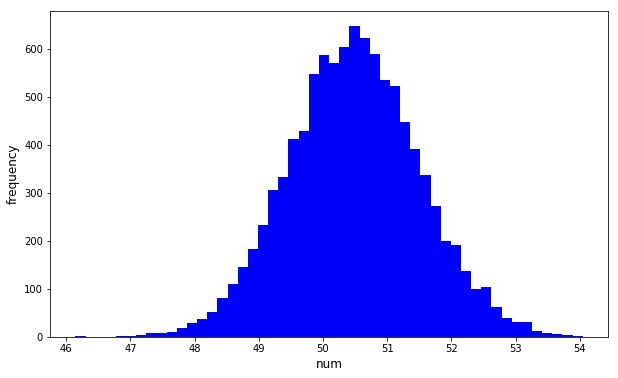

In [2]:
'''
产生不同分布的随机序列
这里每个样本内各点服从自由度不同的 chi^2 分布
样本容量100
重复采样10000次
'''

random_list = []

for i in range(10000):
    random_number = []
    for j in range(1,101):
        random_number.append(np.random.chisquare(j)) 
    random_mean = np.mean(random_number)
    random_list.append(random_mean)

fig = plt.figure(figsize=[10,6])
ax = fig.add_subplot(111)
ax.hist(random_list, bins=50, color='b')
ax.set_xlabel(r'num', fontsize=12)
ax.set_ylabel(r'frequency', fontsize=12)
plt.show()

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  del sys.path[0]


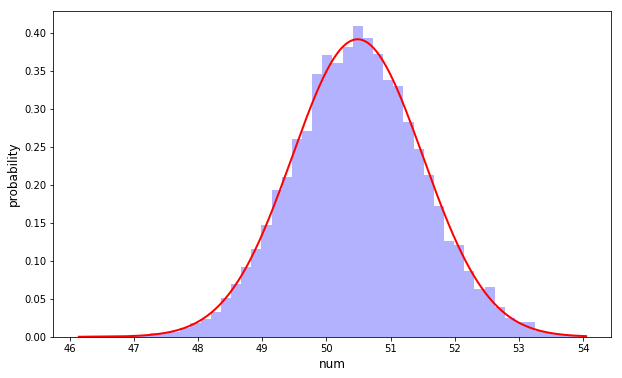

mu = 50.48683686231865 sigma =  1.0174797433407299


In [7]:
'''
计算所得各次采样均值总体的均值和方差
画出相应的正态分布曲线
'''

random_list.sort()
mu =np.mean(random_list)
sigma =np.std(random_list)

fig = plt.figure(figsize=[10,6])
ax = fig.add_subplot(111)
ax.hist(random_list, bins=50, density=1, color='b', alpha=0.3)
y = mlab.normpdf(random_list, mu, sigma)
ax.plot(random_list, y, 'r-', linewidth=2)
ax.set_xlabel(r'num', fontsize=12)
ax.set_ylabel(r'probability', fontsize=12)
plt.show()

print('mu =', mu, 'sigma = ', sigma)

In [4]:
'''
按照此计算得到的正态分布抽取新的样本
'''

random_new = np.random.normal(loc=mu, scale=sigma, size=10000)

In [5]:
'''
KS检验
利用根据正态分布产生的新样本
'''

kst = stats.ks_2samp(random_list, random_new)
print(kst)

Ks_2sampResult(statistic=0.0089, pvalue=0.8232670451557268)


In [6]:
'''
另一种KS检验
减去均值除以标准差，和标准正态对比
'''

random_list = np.array(random_list)
random_norm = (random_list-mu)/sigma
kst = stats.kstest(random_norm, 'norm')
print(kst)

KstestResult(statistic=0.005452932708631675, pvalue=0.9274651191809065)
